In [527]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [528]:
#https://github.com/krpiyush5/SGD-on-Boston-Dataset/blob/master/06%20Implement%20SGD.ipynb
boston=load_boston()

In [529]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [530]:
data=boston.data
Y=boston.target
dataframe=pd.DataFrame(data)
X=dataframe.as_matrix()
print(dataframe.head())

#scaler=StandardScaler()
#data=scaler.fit_transform(data)
#price=boston.target
#df=pd.DataFrame(data,price)
#df[13]=df[10]//df[12]
#df['price']=boston.target
#print(df.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [531]:
X_tr,X_test,Y_tr,Y_test=train_test_split(dataframe,Y,test_size=0.3,random_state=4)
#data=boston.data
scaler=StandardScaler()
X_tr=scaler.fit_transform(X_tr)
X_test=scaler.fit_transform(X_test)
#price=boston.target
df=pd.DataFrame(X_tr)
df['price']=Y_tr
#print(df.head())
print(X_tr.shape)
print(X_test.shape)
print(Y_tr.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [532]:
#W=np.random.normal(0,1,df.shape[1])
W=np.zeros(shape=(1,13))
W

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [533]:
k=25
B=0
r=0.001
itera=1000
while itera>=0:
    w=W
    b=B
    random=df.sample(k)
    x=np.array(random.drop('price',axis=1))
    #print(x.shape)
    y=np.array(random['price'])
    derivative_w=np.zeros(shape=(1,13))
    derivative_b=0
    for i in range(k):
        derivative_w+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))
        derivative_b+=(-2)*(y[i]-(np.dot(w,x[i])+b))
    W=(w-r*(derivative_w)/k)
    B=(b-r*(derivative_b)/k)
    #r=r/2
    itera-=1
print(W)
print(B)

[[-0.66420985  0.38490873 -0.56907786  1.15609307 -0.44514587  2.60186207
  -0.17254941 -1.33088312  0.3748435  -0.47724059 -1.45132229  0.75158293
  -2.84728788]]
[19.13796162]


Text(0,0.5,'Predicted prices')

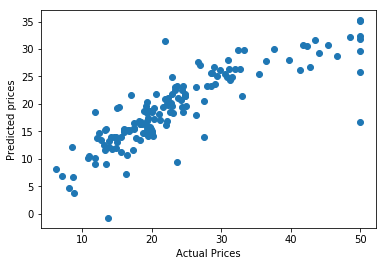

In [534]:
y_pred=np.zeros(shape=(152,1))
for i in range(len(X_test)):
    y_pred=np.dot(W,X_test.T)+B
    
#print(Y_test)
#print(len(y_pred)==len(Y_test))
#print(isinstance(Y_test,np.ndarray))
#print(np.ravel(y_pred))
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted prices')

In [535]:
print('The mean squared error for self written algorithm is',mean_squared_error(Y_test,pred))
print('The mean absolute error for self written algorithm is',mean_absolute_error(Y_test,pred))

The mean squared error for self written algorithm is 32.500303521521154
The mean absolute error for self written algorithm is 3.802185169118012


Text(0,0.5,'Predicted prices')

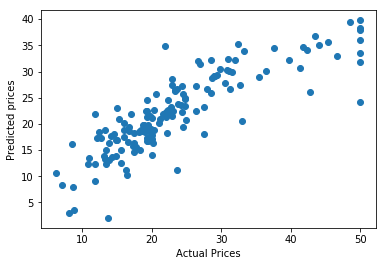

In [536]:
model=SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )
model.fit(X_tr,Y_tr)
pred=model.predict(X_test)
plt.scatter(Y_test,pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted prices')

In [537]:
print('The mean squared error for inbuilt algorithm is',mean_squared_error(Y_test,pred))
print('The mean absolute error for inbuilt algorithm is',mean_absolute_error(Y_test,pred))

The mean squared error for inbuilt algorithm is 32.2077169692522
The mean absolute error for inbuilt algorithm is 3.7936803594332615


In [538]:
W_scikit=model.coef_
W_scikit

array([-1.0949434 ,  1.29752495, -0.07451777,  1.03886627, -1.7096342 ,
        2.17583111, -0.10971358, -3.32275667,  2.89267965, -2.39752991,
       -1.7426156 ,  0.86313296, -3.73671315])

In [543]:
W=W.T
from prettytable import PrettyTable
x=PrettyTable()
column_names=(['Manual SGD weight values','Scikit-Learn SGD weight values'])
x.add_column(column_names[0],W)
x.add_column(column_names[1],W_scikit.T)
print(x)

+--------------------------+--------------------------------+
| Manual SGD weight values | Scikit-Learn SGD weight values |
+--------------------------+--------------------------------+
|      [-0.66420985]       |      -1.0949434000555538       |
|       [0.38490873]       |       1.297524951253267        |
|      [-0.56907786]       |      -0.07451777464126837      |
|       [1.15609307]       |       1.0388662678484226       |
|      [-0.44514587]       |      -1.7096341978978646       |
|       [2.60186207]       |       2.1758311124853447       |
|      [-0.17254941]       |      -0.10971357835419784      |
|      [-1.33088312]       |       -3.322756665430934       |
|       [0.3748435]        |       2.8926796458064072       |
|      [-0.47724059]       |      -2.3975299058735597       |
|      [-1.45132229]       |      -1.7426156046454722       |
|       [0.75158293]       |       0.8631329610839125       |
|      [-2.84728788]       |       -3.736713150493559       |
+-------